<a href="https://colab.research.google.com/github/sanyagupta31/LLM-based-clone/blob/main/wine_by_PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing  import StandardScaler

In [5]:
data = pd.read_csv('/content/archive.zip')
data.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1


In [6]:
mean_values = data.mean()
mean_values

,0
Alcohol,13.000618
Malic_Acid,2.336348
Ash,2.366517
Ash_Alcanity,19.494944
Magnesium,99.741573
Total_Phenols,2.295112
Flavanoids,2.029270
Nonflavanoid_Phenols,0.361854
Proanthocyanins,1.590899
Color_Intensity,5.058090


In [7]:
data_centered = data - mean_values
data_centered

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
0,1.229382,-0.626348,0.063483,-3.894944,27.258427,0.504888,1.03073,-0.081854,0.699101,0.58191,0.082551,1.308315,318.106742,-0.938202
1,0.199382,-0.556348,-0.226517,-8.294944,0.258427,0.354888,0.73073,-0.101854,-0.310899,-0.67809,0.092551,0.788315,303.106742,-0.938202
2,0.159382,0.023652,0.303483,-0.894944,1.258427,0.504888,1.21073,-0.061854,1.219101,0.62191,0.072551,0.558315,438.106742,-0.938202
3,1.369382,-0.386348,0.133483,-2.694944,13.258427,1.554888,1.46073,-0.121854,0.589101,2.74191,-0.097449,0.838315,733.106742,-0.938202
4,0.239382,0.253652,0.503483,1.505056,18.258427,0.504888,0.66073,0.028146,0.229101,-0.73809,0.082551,0.318315,-11.893258,-0.938202
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,0.709382,3.313652,0.083483,1.005056,-4.741573,-0.615112,-1.41927,0.158146,-0.530899,2.64191,-0.317449,-0.871685,-6.893258,1.061798
174,0.399382,1.573652,0.113483,3.505056,2.258427,-0.495112,-1.27927,0.068146,-0.180899,2.24191,-0.257449,-1.051685,3.106742,1.061798
175,0.269382,1.943652,-0.106517,0.505056,20.258427,-0.705112,-1.33927,0.068146,-0.240899,5.14191,-0.367449,-1.051685,88.106742,1.061798
176,0.169382,0.253652,0.003483,0.505056,20.258427,-0.645112,-1.34927,0.168146,-0.130899,4.24191,-0.357449,-0.991685,93.106742,1.061798


In [8]:
con_matrix = np.cov(data_centered.T)
con_matrix

array([[ 6.59062328e-01,  8.56113090e-02,  4.71151590e-02,
        -8.41092903e-01,  3.13987812e+00,  1.46887218e-01,
         1.92033222e-01, -1.57542595e-02,  6.35175205e-02,
         1.02828254e+00, -1.33134432e-02,  4.16978226e-02,
         1.64567185e+02, -2.06515267e-01],
       [ 8.56113090e-02,  1.24801540e+00,  5.02770393e-02,
         1.07633171e+00, -8.70779534e-01, -2.34337723e-01,
        -4.58630366e-01,  4.07333619e-02, -1.41146982e-01,
         6.44838183e-01, -1.43325638e-01, -2.92447483e-01,
        -6.75488666e+01,  3.79038596e-01],
       [ 4.71151590e-02,  5.02770393e-02,  7.52646353e-02,
         4.06208278e-01,  1.12293658e+00,  2.21455913e-02,
         3.15347299e-02,  6.35847140e-03,  1.51557799e-03,
         1.64654327e-01, -4.68215451e-03,  7.61835841e-04,
         1.93197391e+01, -1.05554498e-02],
       [-8.41092903e-01,  1.07633171e+00,  4.06208278e-01,
         1.11526862e+01, -3.97476036e+00, -6.71149146e-01,
        -1.17208281e+00,  1.50421856e-01, -3.

In [10]:
eigenvalues, eigenvectors = np.linalg.eig(con_matrix)
print(eigenvalues)
print(eigenvectors)

[9.92020307e+04 1.72536596e+02 9.53119601e+00 5.10080996e+00
 1.28578826e+00 8.68166571e-01 2.87006972e-01 1.55278963e-01
 1.13733317e-01 8.63784262e-02 4.62026188e-02 8.09265892e-03
 3.49273038e-02 2.07626732e-02]
[[-1.65926191e-03 -1.20426744e-03  1.83035443e-02  1.36988601e-01
  -4.89326076e-02  2.02080449e-01  8.90116287e-01 -3.49028029e-01
  -1.04297167e-01  5.75902207e-02  8.90749178e-02  1.34219856e-02
  -3.47767055e-02  4.24032585e-03]
 [ 6.81019030e-04 -2.15953126e-03  1.24559463e-01  1.56739376e-01
   5.28930958e-01  8.03839930e-01 -1.46858065e-01  7.55207359e-02
  -1.02255162e-02 -3.36100827e-02 -7.74361990e-03 -1.20548686e-02
   3.57362843e-02 -6.32356961e-02]
 [-1.94905197e-04 -4.59399561e-03  5.12928854e-02 -1.20471220e-02
  -2.58456588e-02  4.16939040e-02  5.03492983e-02  1.50528090e-01
  -6.88814741e-02 -1.07161337e-01 -3.53255783e-01 -1.62344580e-01
  -8.91486857e-01  8.64880935e-02]
 [ 4.67130461e-03 -2.64607000e-02  9.28099861e-01 -3.56990103e-01
  -6.96112674e-02 -2

In [11]:
sorted_indices = np.argsort(eigenvalues)[::-1]
sorted_eigenvalues = eigenvalues[sorted_indices]
sorted_eigenvectors = eigenvectors[:, sorted_indices]
print(sorted_eigenvalues)
print(sorted_eigenvectors)

[9.92020307e+04 1.72536596e+02 9.53119601e+00 5.10080996e+00
 1.28578826e+00 8.68166571e-01 2.87006972e-01 1.55278963e-01
 1.13733317e-01 8.63784262e-02 4.62026188e-02 3.49273038e-02
 2.07626732e-02 8.09265892e-03]
[[-1.65926191e-03 -1.20426744e-03  1.83035443e-02  1.36988601e-01
  -4.89326076e-02  2.02080449e-01  8.90116287e-01 -3.49028029e-01
  -1.04297167e-01  5.75902207e-02  8.90749178e-02 -3.47767055e-02
   4.24032585e-03  1.34219856e-02]
 [ 6.81019030e-04 -2.15953126e-03  1.24559463e-01  1.56739376e-01
   5.28930958e-01  8.03839930e-01 -1.46858065e-01  7.55207359e-02
  -1.02255162e-02 -3.36100827e-02 -7.74361990e-03  3.57362843e-02
  -6.32356961e-02 -1.20548686e-02]
 [-1.94905197e-04 -4.59399561e-03  5.12928854e-02 -1.20471220e-02
  -2.58456588e-02  4.16939040e-02  5.03492983e-02  1.50528090e-01
  -6.88814741e-02 -1.07161337e-01 -3.53255783e-01 -8.91486857e-01
   8.64880935e-02 -1.62344580e-01]
 [ 4.67130461e-03 -2.64607000e-02  9.28099861e-01 -3.56990103e-01
  -6.96112674e-02 -2

In [12]:
K=1
top_k_eigenvectors = sorted_eigenvectors[:,:K]
print(top_k_eigenvectors)

[[-1.65926191e-03]
 [ 6.81019030e-04]
 [-1.94905197e-04]
 [ 4.67130461e-03]
 [-1.78679787e-02]
 [-9.89831553e-04]
 [-1.56729290e-03]
 [ 1.23086954e-04]
 [-6.00609082e-04]
 [-2.32712720e-03]
 [-1.71381131e-04]
 [-7.04935892e-04]
 [-9.99821721e-01]
 [ 1.55934284e-03]]


In [13]:
data_1d = np.dot(data_centered,top_k_eigenvectors)
print(data_1d)

[[-318.56405485]
 [-303.09851427]
 [-438.06206336]
 [-733.24071086]
 [  11.56995158]
 [-703.23179976]
 [-542.97238385]
 [-548.40265601]
 [-298.03796354]
 [-298.05065382]
 [-763.08024724]
 [-532.94404289]
 [-572.8351771 ]
 [-402.92633159]
 [-800.05388427]
 [-563.24635617]
 [-533.38046504]
 [-383.31858794]
 [-933.11871604]
 [ -98.40452076]
 [ -33.595016  ]
 [ -23.14787238]
 [-288.09414302]
 [-267.98264981]
 [ -98.02122965]
 [ -83.50010524]
 [-447.92651476]
 [-537.91997414]
 [-168.21172606]
 [-288.00936001]
 [-538.02726098]
 [-768.09346803]
 [-243.1519183 ]
 [-488.60214882]
 [-348.23204659]
 [-173.08121   ]
 [-133.28772447]
 [-358.01958696]
 [-273.04556264]
 [ -13.64444837]
 [ -48.43104627]
 [-287.88520526]
 [-348.09638803]
 [  66.81311118]
 [-138.22830481]
 [-333.2558636 ]
 [-318.11292475]
 [-238.11265862]
 [-313.12099769]
 [-513.18858705]
 [-402.9399904 ]
 [-517.92979668]
 [-443.26733537]
 [-628.28677008]
 [-313.39869456]
 [-373.33430022]
 [-223.41829763]
 [-523.07367849]
 [-538.1829060

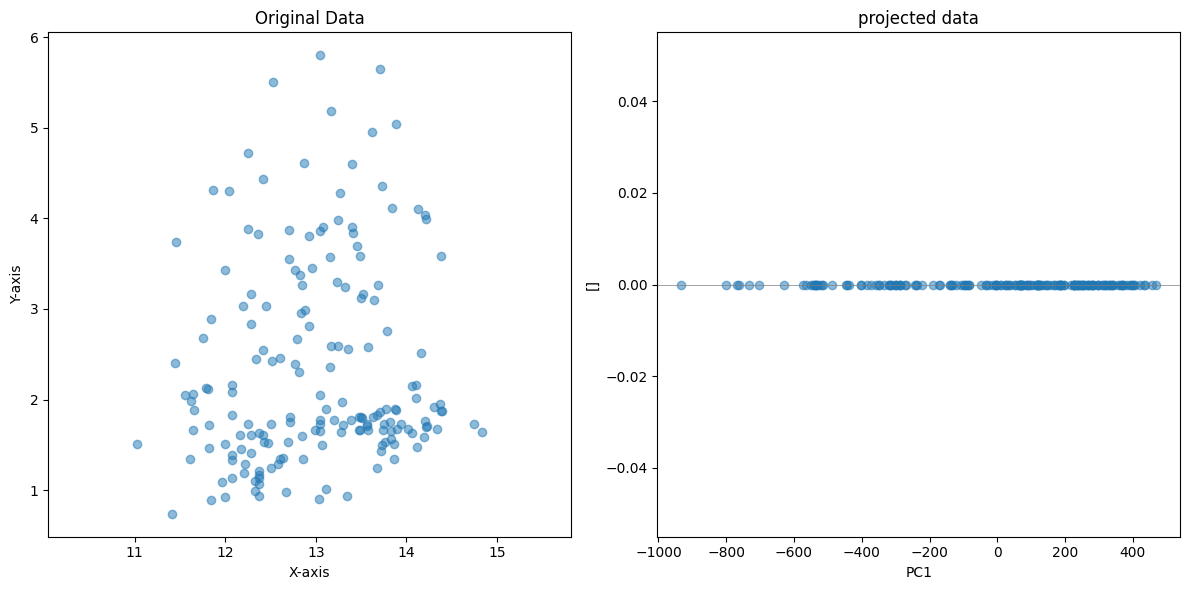

In [23]:
if isinstance(data, pd.DataFrame):
    data = data.values


plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.scatter(data[:,0], data[:,1],alpha=0.5)
plt.title('Original Data')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.axis('equal')

plt.subplot(1,2,2)
plt.scatter(data_1d[:,0],np.zeros_like(data_1d[:,0]),alpha=0.5)
plt.title('projected data')
plt.xlabel('PC1')
plt.ylabel([])
plt.axhline(0,color='gray',lw=0.5)
plt.tight_layout()
plt.show()